In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("main_apple.csv")

In [3]:
df.head()

,name,size,price,rating_count_tot,rating,content_rating,category
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping
4,Bible,92774400,0.00,985920,4.5,4+,Reference


In [4]:
df['size'] = df['size'].apply(lambda x: x/(1000000))

In [5]:
df.head()

,name,size,price,rating_count_tot,rating,content_rating,category
0,PAC-MAN Premium,100.788224,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158.578688,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,0.00,262241,4.0,12+,Shopping
4,Bible,92.774400,0.00,985920,4.5,4+,Reference


<h2>Now let's see what portion of the apps on the appstore are free and how much is paid</h2>

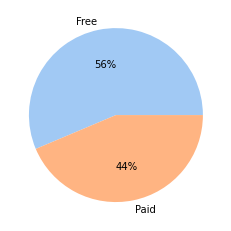

In [6]:
price_of_apps = [df[df['price'] == 0].shape[0]]
price_of_apps.append(df.shape[0] - price_of_apps[0])

labels = ['Free', 'Paid']

colors = sns.color_palette('pastel')[0:5]
plt.pie(price_of_apps, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<p><b>Okay we can see that about 44% of the applications on the app store are paid and the rest are free</b></p>

<h2>Let's see how the prices of apps are distributed</h2>

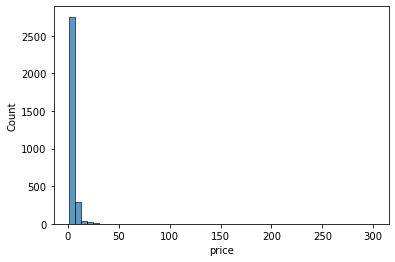

In [7]:
price_categ = df[df['price'] > 0][['price','category']]
sns.histplot(price_categ['price'], bins =50)

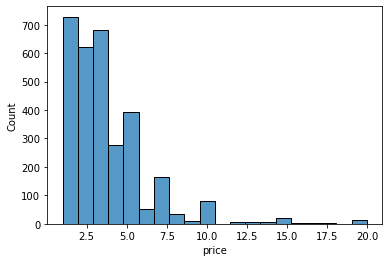

In [8]:
price_below_20 = df[(df['price'] > 0) & (df['price'] <20)]['price']
sns.histplot(price_below_20, bins =20)

In [9]:
free_categ = df[df['price'] == 0]['category']
paid_categ = df[df['price']>0]['category']
categ = df['category']

In [10]:
paid_categ = paid_categ.value_counts().to_dict()
free_categ = free_categ.value_counts().to_dict()
categ = categ.value_counts().to_dict()

In [16]:
list(free_categ.values())

[2257,
 334,
 167,
 143,
 132,
 121,
 109,
 94,
 84,
 79,
 76,
 67,
 66,
 62,
 58,
 56,
 43,
 31,
 20,
 20,
 20,
 9,
 8]

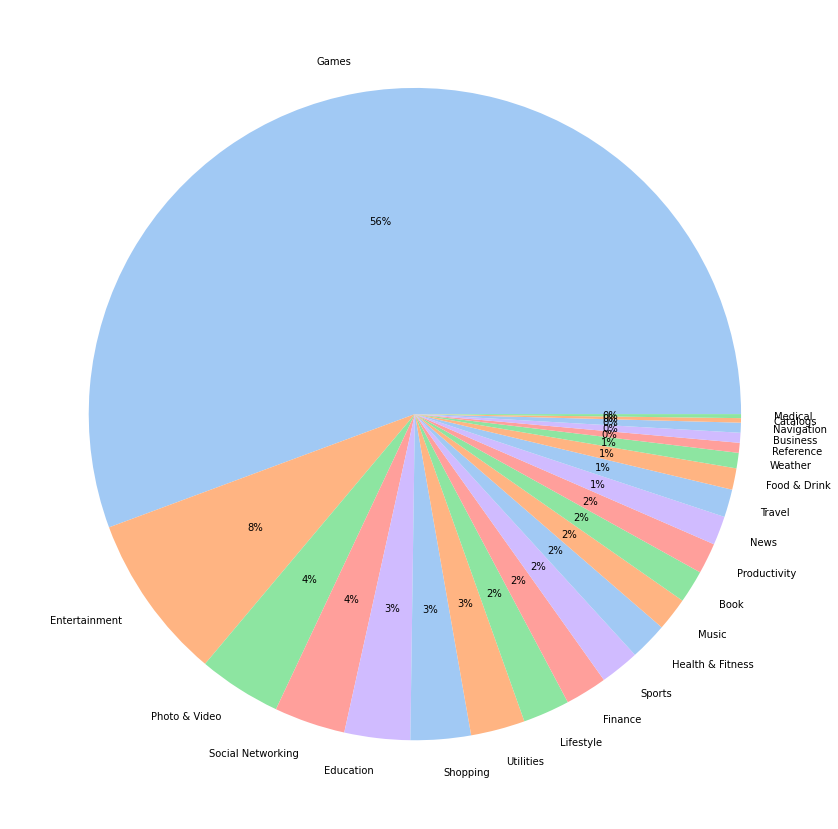

In [19]:
colors = sns.color_palette('pastel')[0:5]
plt.rcParams["figure.figsize"] = (15,15)
plt.pie(list(free_categ.values()), labels = list(free_categ.keys()), colors = colors, autopct='%.0f%%')
plt.show()

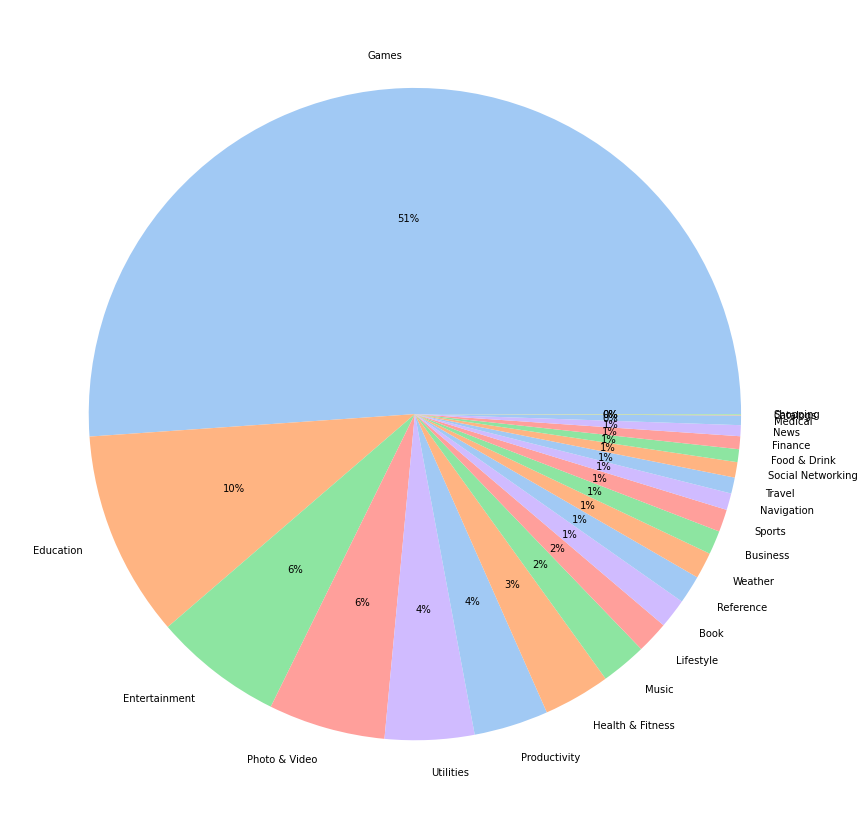

In [20]:
colors = sns.color_palette('pastel')[0:5]
plt.rcParams["figure.figsize"] = (15,15)
plt.pie(list(paid_categ.values()), labels = list(paid_categ.keys()), colors = colors, autopct='%.0f%%')
plt.show()

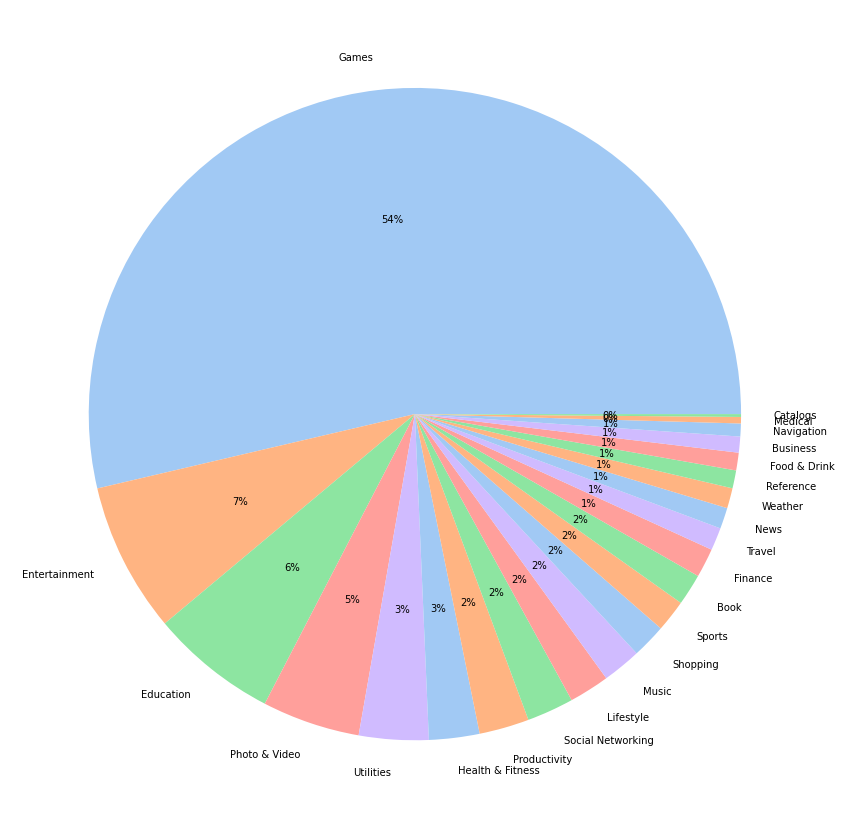

In [21]:
colors = sns.color_palette('pastel')[0:5]
plt.rcParams["figure.figsize"] = (15,15)
plt.pie(list(categ.values()), labels = list(categ.keys()), colors = colors, autopct='%.0f%%')
plt.show()

In [24]:
len(list(paid_categ.keys()))

23

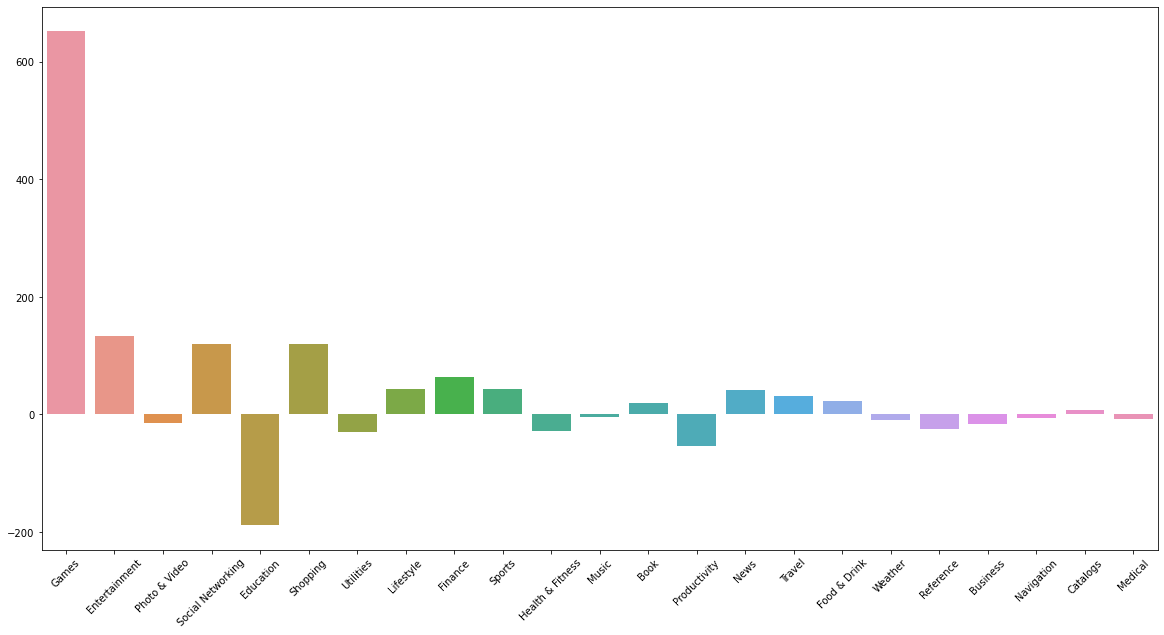

In [37]:
difference = {}
for x in free_categ:
    difference[x] = int(free_categ[x] - paid_categ[x])

plt.rcParams["figure.figsize"] = (20, 10)
plt.xticks(rotation = 45)
sns.barplot(x=list(difference.keys()),y =list(difference.values()))

In [33]:
list(difference.keys())

['Games',
 'Entertainment',
 'Photo & Video',
 'Social Networking',
 'Education',
 'Shopping',
 'Utilities',
 'Lifestyle',
 'Finance',
 'Sports',
 'Health & Fitness',
 'Music',
 'Book',
 'Productivity',
 'News',
 'Travel',
 'Food & Drink',
 'Weather',
 'Reference',
 'Business',
 'Navigation',
 'Catalogs',
 'Medical']

In [30]:
list(difference.values())

[652,
 133,
 -15,
 119,
 -189,
 120,
 -30,
 44,
 64,
 44,
 -28,
 -4,
 20,
 -54,
 41,
 31,
 23,
 -10,
 -24,
 -17,
 -6,
 8,
 -7]